# SVM
* Supervised learning
* Classification

# Decision Tree
* Supervised learning
* Simple to understand and interpret
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. (For example, relation rules can be used only with nominal variables while neural networks can be used only with numerical variables or categoricals converted to 0-1 values)
* Requires little data preparation. Other techniques often require data normalization. Since trees can handle qualitative predictors, there is no need to create dummy variables
* Uses a white box model. If a given situation is observable in a model the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model, the explanation for the results is typically difficult to understand, for example with an artificial neural network
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Non-statistical approach that makes no assumptions of the training data or prediction residuals; e.g., no distributional, independence, or constant variance assumptions
* Performs well with large datasets. Large amounts of data can be analysed using standard computing resources in reasonable time.
* Mirrors human decision making more closely than other approaches. This could be useful when modeling human decisions/behavior
* Robust against co-linearity, particularly boosting
* In built feature selection. Additional irrelevant feature will be less used so that they can be removed on subsequent runs

# KNN
* Supervised learning
* Used for **classification** and **regression**
* It's used for classification and regression of **known data** where usually the target attribute/variable is known before hand
* KNN doesn’t have a training phase as such. But the prediction of a test observation is done based on the K-Nearest (often euclidean distance) Neighbours (observations) based on weighted averages/votes

## Model Evaluation

### Precision
* Accuracy

$$Precision = \frac{TP}{TP + FP}$$

### Recall
* Completeness

$$Recall = \frac{TP}{TP + FN}$$

### F-Measure
* Harmonic Mean

$$FMeasure = \frac{2*Precision*Recall}{Precision + Recall}$$

## Imports and Definitions

In [227]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from ggplot import *

import os

In [199]:
def input_dir():
    return os.getcwd() + '/data/'

def output_dir():
    return os.getcwd() + '/data/'

fformat = '.csv'

## Get data

In [200]:
rdata = open(input_dir() + 'wrangled_intro-cs-grades-2017_1' + fformat, 'r+')
test = open(input_dir() + 'wrangled_intro-cs-grades-2017_2' + fformat, 'r+')

### Adjust data

In [201]:
data = []
df = pd.read_csv(rdata)
df = df.fillna(0)
df

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence,finalgrade,class
0,2017,8.57,2.86,4.29,0.00,2.86,0.00,0.00,0.00,0.0,0,7,1.75,24,II,A
1,2017,10.00,10.00,7.14,5.57,10.00,10.00,10.00,8.71,10.0,10,6,10.54,0,SS,A
2,2017,7.14,5.71,4.29,0.00,6.14,1.43,0.00,0.71,9.0,1,4,4.48,0,MM,A
3,2017,10.00,4.29,4.29,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.35,50,SR,A
4,2017,10.00,10.00,10.00,4.29,10.00,10.00,10.00,8.57,10.0,9,10,10.87,0,SS,A
5,2017,10.00,10.00,7.14,7.14,8.57,10.00,8.43,7.29,10.0,0,9,6.09,0,MM,A
6,2017,7.14,2.86,1.43,0.00,4.00,1.29,1.43,3.43,0.0,0,6,1.60,0,II,A
7,2017,10.00,7.14,1.43,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.35,75,SR,A
8,2017,8.57,4.29,1.43,10.00,10.00,10.00,10.00,8.57,10.0,9,8,10.28,0,SS,A
9,2017,4.29,10.00,5.71,0.00,10.00,1.43,10.00,8.57,10.0,0,8,5.54,0,MM,A


In [202]:
df.loc[:, 'assignment1':'exam1']

X = np.array(df.loc[:, 'assignment1':'exam1'])
Y = np.array(df.loc[:, 'finalgrade'])

In [203]:
X

array([[ 8.57,  2.86,  4.29, ...,  0.  ,  0.  ,  0.  ],
       [10.  , 10.  ,  7.14, ..., 10.  ,  8.71, 10.  ],
       [ 7.14,  5.71,  4.29, ...,  0.  ,  0.71,  9.  ],
       ...,
       [10.  , 10.  , 10.  , ...,  1.43,  5.71,  9.5 ],
       [10.  ,  8.57,  8.57, ...,  7.14,  5.  , 10.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [204]:
Y

array(['II', 'SS', 'MM', 'SR', 'SS', 'MM', 'II', 'SR', 'SS', 'MM', 'MI',
       'MM', 'SS', 'SS', 'MM', 'MM', 'MS', 'MM', 'MM', 'MS', 'SR', 'SR',
       'SS', 'MI', 'MI', 'MM', 'MM', 'SR', 'II', 'SR', 'SR', 'MS', 'SR',
       'II', 'SR', 'SR', 'TR', 'MM', 'TR', 'SS', 'SS', 'TR', 'TR', 'TR',
       'TR', 'MS', 'SS', 'SS', 'II', 'MM', 'MM', 'MM', 'MM', 'TR', 'II',
       'MM', 'MM', 'SS', 'SR', 'SR', 'SR', 'SS', 'MM', 'MM', 'II', 'SS',
       'SR', 'SS', 'MM', 'MS', 'SS', 'SS', 'SS', 'MM', 'TR', 'SS', 'TR',
       'MM', 'MS', 'TR', 'MS', 'SS', 'II', 'SS', 'TR', 'MM', 'MI', 'MI',
       'II', 'TR', 'SR', 'II', 'TR', 'TR', 'SR', 'SS', 'TR', 'TR', 'TR',
       'MS', 'TR', 'MS', 'SS', 'SS', 'TR', 'TR', 'MS', 'MI', 'SS', 'SS',
       'SS', 'II', 'TR', 'SR', 'TR', 'TR', 'SR', 'SR', 'SR', 'SS', 'MS',
       'SS', 'SR', 'MM', 'MM', 'SS', 'MM', 'II', 'SS', 'SS', 'TR', 'SS',
       'II', 'II', 'TR', 'SR', 'TJ', 'SR', 'TR', 'II', 'SR', 'SR', 'SS',
       'MS', 'SS', 'SR', 'MI', 'SR', 'TR', 'SR', 'S

### Test data

In [205]:
df = pd.read_csv(test)

In [206]:
df = df.fillna(0)

## SVM

In [221]:
svm_model = svm.SVC(kernel='linear',gamma=0.001, C=100)
svm_model.fit(X,Y)
svm_model.score(X,Y)

X_test = np.array(df.loc[:, 'assignment1':'exam1'])
Y_test = np.array(df.loc[:, 'finalgrade'])

y = svm_model.predict(X_test)

print (y)

['MI' 'MS' 'MI' 'SS' 'SS' 'SS' 'II' 'SS' 'MS' 'SS' 'MI' 'TR' 'MI' 'SS'
 'MI' 'SS' 'MI' 'II' 'II' 'II' 'MM' 'II' 'II' 'SR' 'SR' 'MS' 'SR' 'MI'
 'MM' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'MS' 'SS' 'MM' 'SR' 'II' 'MI' 'SS'
 'SR' 'II' 'SR' 'SR' 'SR' 'SS' 'II' 'MI' 'SR' 'MI' 'SS' 'MS' 'SS' 'MI'
 'SR' 'SS' 'MI' 'MI' 'MI' 'MM' 'MI' 'MS' 'II' 'SS' 'II' 'MI' 'MI' 'TR'
 'MI' 'SS' 'MI' 'SR' 'MI' 'SR' 'MS' 'II' 'SR' 'SR' 'SR' 'SS' 'TR' 'SR'
 'SS' 'TR' 'SR' 'SS' 'SS' 'TR' 'SS' 'II' 'II' 'MI' 'SR' 'SS' 'MI' 'MI'
 'SR' 'SR' 'MM' 'MS' 'MM' 'SS' 'II' 'SS' 'SR' 'SS' 'SS' 'SS' 'SS' 'SS'
 'TR' 'SS' 'SR' 'SS' 'MS' 'MI' 'SS' 'SS' 'SR' 'SS' 'MI' 'MM' 'SR' 'SR'
 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'TR'
 'SR' 'TR' 'MI' 'II' 'II' 'MS' 'II' 'SR' 'SS' 'MI' 'II' 'MI' 'II' 'TR'
 'SS' 'SS' 'MI' 'MI' 'SS' 'SS' 'SR' 'SS' 'SS' 'MS' 'MM' 'SR' 'SS' 'SS'
 'SR' 'MI' 'MI' 'SR' 'MM' 'MI' 'MM' 'SS' 'II' 'SS' 'SS' 'SR' 'II' 'TR'
 'MM' 'SR' 'SR' 'MM' 'SR' 'MS' 'TR' 'SR' 'MI' 'SR' 'II' 'SR' 'SS' 'SR'
 'SR' 

In [222]:
print (Y_test)

['II' 'MS' 'MM' 'MS' 'MM' 'MS' 'II' 'MS' 'MM' 'SS' 'MM' 'II' 'II' 'SS'
 'MS' 'MM' 'II' 'MS' 'II' 'MM' 'SS' 'MI' 'II' 'SR' 'SR' 'MS' 'TR' 'II'
 'SS' 'SR' 'SR' 'SR' 'II' 'MS' 'SR' 'MS' 'MS' 'MS' 'SR' 'II' 'II' 'SS'
 'SR' 'MI' 'II' 'SR' 'SR' 'MS' 'II' 'MI' 'SR' 'MS' 'MS' 'MI' 'MS' 'MM'
 'SR' 'MM' 'II' 'MI' 'MM' 'MS' 'MI' 'MM' 'II' 'MS' 'II' 'MI' 'II' 'II'
 'MI' 'SS' 'MI' 'SR' 'MM' 'SR' 'MS' 'II' 'SR' 'SR' 'SR' 'MM' 'TR' 'TR'
 'MM' 'SR' 'TR' 'SS' 'SS' 'SR' 'MS' 'MM' 'MI' 'II' 'SR' 'MS' 'MI' 'II'
 'TR' 'SR' 'MM' 'MS' 'MS' 'SS' 'SR' 'MM' 'SR' 'MS' 'SS' 'SS' 'MS' 'SS'
 'TR' 'MS' 'SR' 'SS' 'MM' 'II' 'SS' 'SS' 'SR' 'MS' 'MM' 'MM' 'TR' 'TR'
 'TR' 'SR' 'SR' 'SR' 'SR' 'SR' 'MM' 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'II'
 'SR' 'SR' 'MM' 'II' 'MI' 'SS' 'II' 'SR' 'MS' 'MS' 'II' 'MI' 'MM' 'II'
 'MM' 'MS' 'MM' 'MI' 'SS' 'SS' 'TR' 'SS' 'SS' 'MM' 'SS' 'TR' 'SS' 'SS'
 'TR' 'MS' 'MS' 'TR' 'MM' 'MM' 'MS' 'SS' 'MM' 'SS' 'SS' 'SR' 'SR' 'SR'
 'MS' 'TR' 'SR' 'MM' 'TR' 'MS' 'SR' 'SR' 'II' 'TR' 'MI' 'TR' 'SS' 'SR'
 'SR' 

In [223]:
correct = (y == Y_test)
accuracy = correct.sum() / correct.size
accuracy

0.4409221902017291

In [224]:
c = (np.array(y) == np.array(Y_test))
c

array([False,  True, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False,  True,

## Decision Tree Classifier

In [225]:
regr = DecisionTreeClassifier(max_depth=5)
regr.fit(X, Y)

y = regr.predict(X_test)

print (y)

['MS' 'MM' 'MS' 'SS' 'SS' 'SS' 'MS' 'SS' 'SS' 'SS' 'MS' 'TR' 'MS' 'SS'
 'MS' 'SS' 'MS' 'MS' 'MS' 'MS' 'SS' 'MS' 'MS' 'SR' 'SR' 'MI' 'SR' 'SR'
 'MS' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'MS' 'SS' 'SS' 'SR' 'MS' 'MI' 'SS'
 'SR' 'MS' 'TR' 'SR' 'SR' 'SS' 'SR' 'SR' 'SR' 'MI' 'MM' 'MS' 'SS' 'MI'
 'SR' 'MI' 'MS' 'MS' 'MS' 'SS' 'MI' 'II' 'MS' 'SS' 'II' 'MS' 'TR' 'TR'
 'MS' 'SS' 'MS' 'SR' 'MS' 'SR' 'MS' 'II' 'SR' 'SR' 'SR' 'MM' 'SR' 'SR'
 'MM' 'SR' 'SR' 'SS' 'SS' 'SR' 'SS' 'MS' 'TR' 'MI' 'SR' 'SS' 'MS' 'II'
 'SR' 'SR' 'MS' 'MS' 'MS' 'SS' 'TR' 'SS' 'SR' 'SS' 'SS' 'SS' 'SS' 'SS'
 'SR' 'SS' 'SR' 'SS' 'MM' 'MS' 'SS' 'SS' 'SR' 'SS' 'MS' 'MI' 'SR' 'SR'
 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'TR'
 'SR' 'SR' 'II' 'MS' 'MI' 'MS' 'II' 'SR' 'SS' 'MS' 'TR' 'II' 'MS' 'SR'
 'SS' 'SS' 'II' 'II' 'SS' 'SS' 'SR' 'SS' 'SS' 'MS' 'SS' 'SR' 'SS' 'SS'
 'SR' 'MI' 'SS' 'SR' 'SS' 'MS' 'SS' 'SS' 'MS' 'SS' 'SS' 'SR' 'II' 'TR'
 'SS' 'SR' 'SR' 'MM' 'SR' 'MS' 'SR' 'SR' 'MS' 'SR' 'MS' 'SR' 'SS' 'SR'
 'SR' 

In [212]:
correct = (y == Y_test)
accuracy = correct.sum() / correct.size
accuracy

0.44668587896253603

In [213]:
c = (np.array(y) == np.array(Y_test))
c

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,

## KNN

In [111]:
n_neighbors = 6
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
y = knn.fit(X, Y).predict(X_test)

print (y)

['MS' 'MS' 'MS' 'SS' 'SS' 'SS' 'MI' 'SS' 'SS' 'SS' 'MS' 'TR' 'MS' 'SS'
 'MM' 'SS' 'MS' 'MS' 'MS' 'MI' 'SS' 'TR' 'MS' 'II' 'SR' 'SS' 'SR' 'MI'
 'MM' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'MS' 'SS' 'SS' 'SR' 'TR' 'II' 'SS'
 'SR' 'II' 'TR' 'SR' 'SR' 'SS' 'TR' 'II' 'SR' 'MI' 'MS' 'MS' 'SS' 'MI'
 'SR' 'SS' 'MS' 'MS' 'MI' 'MM' 'MI' 'MI' 'TR' 'SS' 'II' 'MI' 'MI' 'TR'
 'MS' 'SS' 'MS' 'SR' 'MS' 'SR' 'SS' 'TR' 'SR' 'SR' 'SR' 'SS' 'SR' 'II'
 'SS' 'TR' 'TR' 'SS' 'SS' 'SR' 'SS' 'MS' 'SR' 'II' 'SR' 'SS' 'MS' 'MI'
 'SR' 'SR' 'MS' 'SS' 'MS' 'SS' 'SR' 'SS' 'SR' 'SS' 'SS' 'SS' 'SS' 'SS'
 'TR' 'SS' 'SR' 'SS' 'SS' 'II' 'SS' 'SS' 'TR' 'SS' 'MS' 'SS' 'SR' 'SR'
 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'TR'
 'TR' 'SR' 'II' 'TR' 'II' 'SS' 'II' 'SR' 'SS' 'MS' 'TR' 'MS' 'MS' 'SR'
 'SS' 'SS' 'II' 'MS' 'SS' 'SS' 'SR' 'SS' 'SS' 'MI' 'SS' 'SR' 'SS' 'SS'
 'SR' 'MM' 'SS' 'SR' 'SS' 'MS' 'SS' 'SS' 'MS' 'SS' 'SS' 'SR' 'II' 'TR'
 'SS' 'TR' 'SR' 'SS' 'SR' 'MS' 'TR' 'SR' 'MS' 'SR' 'II' 'TR' 'SS' 'SR'
 'SR' 

In [112]:
correct = (y == Y_test)
accuracy = correct.sum() / correct.size
accuracy

0.4034582132564842

In [113]:
c = (np.array(y) == np.array(Y_test))
c

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,

In [107]:
df.describe()

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,7.849683,6.772594,5.638271,5.314496,4.751009,4.028501,3.703458,0.925072,4.919885,3.571556,4.826081,3.543228,2.877810,3.889568
std,3.700364,4.152904,4.221522,4.444925,4.519819,4.198269,4.092809,2.136966,4.440341,4.497814,4.741054,4.457037,4.002593,3.562756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.140000,2.785000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000
50%,10.000000,10.000000,7.140000,6.860000,4.290000,2.860000,1.300000,0.000000,6.300000,0.000000,4.500000,0.000000,0.000000,3.290000
75%,10.000000,10.000000,10.000000,10.000000,9.860000,8.640000,8.000000,0.000000,9.700000,10.000000,10.000000,9.000000,7.000000,7.110000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


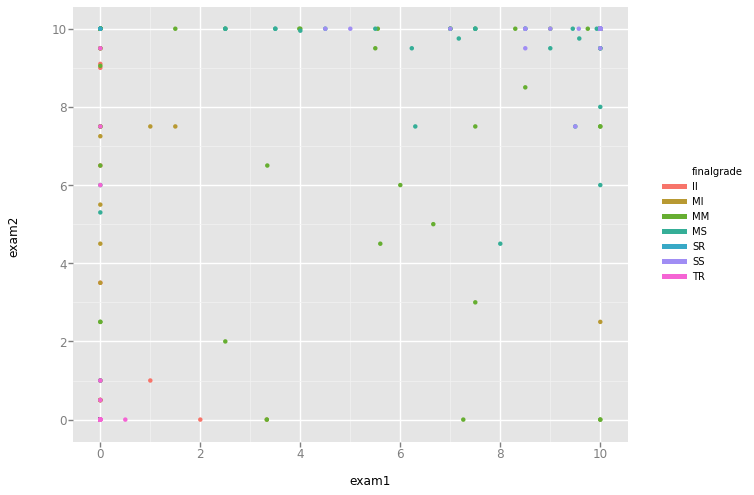

<ggplot: (-9223372036573909532)>

In [132]:
ggplot(df, aes(x = 'exam1', y = 'exam2', colour = 'finalgrade')) +\
    geom_point()

## Random Forests

In [228]:
rf_model = RandomForestClassifier(max_depth=3, random_state=0)
rf_model.fit(X, Y)

y = rf_model.predict(X_test)

print (y)

['MI' 'MS' 'MS' 'SS' 'SS' 'SS' 'II' 'SS' 'SS' 'SS' 'MS' 'TR' 'MS' 'SS'
 'MS' 'SS' 'MS' 'II' 'MI' 'MI' 'SS' 'TR' 'TR' 'TR' 'SR' 'SS' 'SR' 'II'
 'SS' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'MS' 'SS' 'SS' 'SR' 'TR' 'II' 'SS'
 'SR' 'II' 'TR' 'SR' 'TR' 'SS' 'II' 'II' 'SR' 'MS' 'SS' 'MS' 'SS' 'MI'
 'SR' 'SR' 'MS' 'MS' 'MS' 'SS' 'MI' 'MS' 'TR' 'SS' 'II' 'MS' 'II' 'II'
 'MS' 'SS' 'MS' 'SR' 'MS' 'SR' 'SS' 'II' 'SR' 'SR' 'SR' 'SS' 'TR' 'TR'
 'SS' 'TR' 'TR' 'SS' 'SS' 'TR' 'SS' 'MS' 'II' 'II' 'SR' 'SS' 'MS' 'II'
 'SR' 'SR' 'MM' 'MS' 'MM' 'SS' 'II' 'SS' 'SR' 'SS' 'SS' 'SS' 'SS' 'SS'
 'TR' 'SS' 'SR' 'SS' 'SS' 'II' 'SS' 'SS' 'SR' 'SS' 'II' 'II' 'SR' 'SR'
 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'MS' 'SR' 'SR' 'SR' 'SR' 'SR' 'SR' 'II'
 'SR' 'TR' 'II' 'II' 'II' 'SS' 'II' 'SR' 'SS' 'MI' 'TR' 'II' 'TR' 'TR'
 'SS' 'SS' 'MI' 'MI' 'SS' 'SS' 'SR' 'SS' 'SS' 'MI' 'SS' 'SR' 'SS' 'SS'
 'SR' 'MM' 'SS' 'SR' 'SS' 'MS' 'SS' 'SS' 'TR' 'SS' 'SS' 'SR' 'II' 'TR'
 'SS' 'TR' 'SR' 'MI' 'SR' 'MS' 'TR' 'SR' 'MS' 'SR' 'II' 'TR' 'SS' 'SR'
 'SR' 

In [229]:
correct = (y == Y_test)
accuracy = correct.sum() / correct.size
accuracy

0.45244956772334294

In [230]:
c = (np.array(y) == np.array(Y_test))
c

array([False,  True, False, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True,

# Pandas Data Manipulation Experiments

In [141]:
df

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence,finalgrade,class
2016,8.57,10.00,8.57,1.43,5.71,5.14,1.0,5.0,10.0,0.00,0.0,0.0,0.0,1.57,II,A
2017,10.00,10.00,10.00,10.00,10.00,10.00,10.0,5.0,8.9,5.50,10.0,10.0,5.0,7.46,MS,A
2017,10.00,10.00,5.71,3.71,9.71,2.86,10.0,0.0,6.6,1.50,10.0,9.5,0.0,4.71,MM,A
2017,10.00,10.00,7.14,10.00,5.71,2.86,10.0,0.0,6.4,10.00,10.0,7.0,5.0,7.76,MS,A
2017,10.00,10.00,7.14,4.57,9.00,5.71,10.0,0.0,9.9,10.00,0.0,3.0,1.0,5.12,MM,A
2017,10.00,10.00,10.00,1.43,8.57,7.14,10.0,5.0,9.4,10.00,9.5,5.0,0.0,6.45,MS,A
2017,8.57,7.14,5.71,2.86,2.86,5.71,10.0,0.0,8.7,0.00,0.0,0.0,0.0,1.48,II,A
2017,10.00,10.00,10.00,10.00,9.71,8.43,10.0,0.0,9.2,10.00,10.0,9.0,2.0,7.81,MS,A
2017,10.00,6.71,4.29,1.43,7.14,5.71,5.0,0.0,5.4,7.00,10.0,2.0,1.0,4.90,MM,A
2017,10.00,10.00,10.00,10.00,9.86,0.00,10.0,0.0,10.0,10.00,10.0,10.0,8.0,9.38,SS,A


In [143]:
df1 = df
sLength = len(df['year'])
df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)

In [144]:
df1

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence,finalgrade,class,e
2016,8.57,10.00,8.57,1.43,5.71,5.14,1.0,5.0,10.0,0.00,0.0,0.0,0.0,1.57,II,A,1.236327
2017,10.00,10.00,10.00,10.00,10.00,10.00,10.0,5.0,8.9,5.50,10.0,10.0,5.0,7.46,MS,A,0.509755
2017,10.00,10.00,5.71,3.71,9.71,2.86,10.0,0.0,6.6,1.50,10.0,9.5,0.0,4.71,MM,A,1.796143
2017,10.00,10.00,7.14,10.00,5.71,2.86,10.0,0.0,6.4,10.00,10.0,7.0,5.0,7.76,MS,A,0.769690
2017,10.00,10.00,7.14,4.57,9.00,5.71,10.0,0.0,9.9,10.00,0.0,3.0,1.0,5.12,MM,A,0.174994
2017,10.00,10.00,10.00,1.43,8.57,7.14,10.0,5.0,9.4,10.00,9.5,5.0,0.0,6.45,MS,A,0.395270
2017,8.57,7.14,5.71,2.86,2.86,5.71,10.0,0.0,8.7,0.00,0.0,0.0,0.0,1.48,II,A,-0.146568
2017,10.00,10.00,10.00,10.00,9.71,8.43,10.0,0.0,9.2,10.00,10.0,9.0,2.0,7.81,MS,A,0.113291
2017,10.00,6.71,4.29,1.43,7.14,5.71,5.0,0.0,5.4,7.00,10.0,2.0,1.0,4.90,MM,A,0.107171
2017,10.00,10.00,10.00,10.00,9.86,0.00,10.0,0.0,10.0,10.00,10.0,10.0,8.0,9.38,SS,A,0.228426


In [147]:
del df1['e']

In [148]:
df1

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence,finalgrade,class
2016,8.57,10.00,8.57,1.43,5.71,5.14,1.0,5.0,10.0,0.00,0.0,0.0,0.0,1.57,II,A
2017,10.00,10.00,10.00,10.00,10.00,10.00,10.0,5.0,8.9,5.50,10.0,10.0,5.0,7.46,MS,A
2017,10.00,10.00,5.71,3.71,9.71,2.86,10.0,0.0,6.6,1.50,10.0,9.5,0.0,4.71,MM,A
2017,10.00,10.00,7.14,10.00,5.71,2.86,10.0,0.0,6.4,10.00,10.0,7.0,5.0,7.76,MS,A
2017,10.00,10.00,7.14,4.57,9.00,5.71,10.0,0.0,9.9,10.00,0.0,3.0,1.0,5.12,MM,A
2017,10.00,10.00,10.00,1.43,8.57,7.14,10.0,5.0,9.4,10.00,9.5,5.0,0.0,6.45,MS,A
2017,8.57,7.14,5.71,2.86,2.86,5.71,10.0,0.0,8.7,0.00,0.0,0.0,0.0,1.48,II,A
2017,10.00,10.00,10.00,10.00,9.71,8.43,10.0,0.0,9.2,10.00,10.0,9.0,2.0,7.81,MS,A
2017,10.00,6.71,4.29,1.43,7.14,5.71,5.0,0.0,5.4,7.00,10.0,2.0,1.0,4.90,MM,A
2017,10.00,10.00,10.00,10.00,9.86,0.00,10.0,0.0,10.0,10.00,10.0,10.0,8.0,9.38,SS,A


In [156]:
new_column = np.zeros(shape=(1,len(df['year'])))

In [157]:
new_column

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [160]:
df1['e'] = new_column[0]

In [161]:
df1

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence,finalgrade,class,e
2016,8.57,10.00,8.57,1.43,5.71,5.14,1.0,5.0,10.0,0.00,0.0,0.0,0.0,1.57,II,A,0.0
2017,10.00,10.00,10.00,10.00,10.00,10.00,10.0,5.0,8.9,5.50,10.0,10.0,5.0,7.46,MS,A,0.0
2017,10.00,10.00,5.71,3.71,9.71,2.86,10.0,0.0,6.6,1.50,10.0,9.5,0.0,4.71,MM,A,0.0
2017,10.00,10.00,7.14,10.00,5.71,2.86,10.0,0.0,6.4,10.00,10.0,7.0,5.0,7.76,MS,A,0.0
2017,10.00,10.00,7.14,4.57,9.00,5.71,10.0,0.0,9.9,10.00,0.0,3.0,1.0,5.12,MM,A,0.0
2017,10.00,10.00,10.00,1.43,8.57,7.14,10.0,5.0,9.4,10.00,9.5,5.0,0.0,6.45,MS,A,0.0
2017,8.57,7.14,5.71,2.86,2.86,5.71,10.0,0.0,8.7,0.00,0.0,0.0,0.0,1.48,II,A,0.0
2017,10.00,10.00,10.00,10.00,9.71,8.43,10.0,0.0,9.2,10.00,10.0,9.0,2.0,7.81,MS,A,0.0
2017,10.00,6.71,4.29,1.43,7.14,5.71,5.0,0.0,5.4,7.00,10.0,2.0,1.0,4.90,MM,A,0.0
2017,10.00,10.00,10.00,10.00,9.86,0.00,10.0,0.0,10.0,10.00,10.0,10.0,8.0,9.38,SS,A,0.0


In [168]:
new_column = np.zeros(shape=(len(df['year']),1))
new_column

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [163]:
df1['e2'] = new_column

In [182]:
df1

,year,assignment1,assignment2,assignment3,assignment4,assignment5,assignment6,assignment7,assignment8,exam1,exam2,texam,finalscore,presence,finalgrade,class,e,e2
2016,8.57,10.00,8.57,1.43,5.71,5.14,1.0,5.0,10.0,0.00,0.0,0.0,0.0,1.57,II,A,0.0,0.0
2017,10.00,10.00,10.00,10.00,10.00,10.00,10.0,5.0,8.9,5.50,10.0,10.0,5.0,7.46,MS,A,0.0,0.0
2017,10.00,10.00,5.71,3.71,9.71,2.86,10.0,0.0,6.6,1.50,10.0,9.5,0.0,4.71,MM,A,0.0,0.0
2017,10.00,10.00,7.14,10.00,5.71,2.86,10.0,0.0,6.4,10.00,10.0,7.0,5.0,7.76,MS,A,0.0,0.0
2017,10.00,10.00,7.14,4.57,9.00,5.71,10.0,0.0,9.9,10.00,0.0,3.0,1.0,5.12,MM,A,0.0,0.0
2017,10.00,10.00,10.00,1.43,8.57,7.14,10.0,5.0,9.4,10.00,9.5,5.0,0.0,6.45,MS,A,0.0,0.0
2017,8.57,7.14,5.71,2.86,2.86,5.71,10.0,0.0,8.7,0.00,0.0,0.0,0.0,1.48,II,A,0.0,0.0
2017,10.00,10.00,10.00,10.00,9.71,8.43,10.0,0.0,9.2,10.00,10.0,9.0,2.0,7.81,MS,A,0.0,0.0
2017,10.00,6.71,4.29,1.43,7.14,5.71,5.0,0.0,5.4,7.00,10.0,2.0,1.0,4.90,MM,A,0.0,0.0
2017,10.00,10.00,10.00,10.00,9.86,0.00,10.0,0.0,10.0,10.00,10.0,10.0,8.0,9.38,SS,A,0.0,0.0


In [193]:
vec = [[1],[2],[3],[5]]
vec = np.array(vec)
vec

array([[1],
       [2],
       [3],
       [5]])